In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import IPython.display as disp

In [2]:
# 데이터 불러오기 
sal_23 = pd.read_csv('2023_연봉_statiz.csv')
sal_24 = pd.read_csv('2024_연봉_statiz.csv')
sal_25 = pd.read_csv('2025_연봉_statiz.csv')

rookie_24 = pd.read_csv('kbo_draft_2023_전체_숫자.csv') # 신인 선수 계약금

sal_for_23 = pd.read_csv('2023 선수단 등록 현황 자료.csv', encoding='euc-kr') # 외국인 선수
sal_for_24 = pd.read_csv('2024 선수단 등록 현황 자료.csv', encoding='euc-kr')
sal_for_25 = pd.read_csv('2025 선수단 등록 현황 자료.csv', encoding='euc-kr')

### 2024년도 연봉 데이터 합치기 

In [6]:
# 1. 연봉 단위 통일 (만원) 
rookie_24.rename(columns={'계약금': '계약금(만원)'}, inplace=True)
rookie_24['계약금(만원)'] = pd.to_numeric(rookie_24['계약금(만원)'], errors='coerce') / 10000

### 연봉 데이터 + 신인 계약금 데이터 병합하기 

In [9]:
# 1. 선수 + 팀 기준으로 병합을 위한 키 생성
sal_24['선수_팀'] = sal_24['선수'] + '_' + sal_24['팀']
rookie_24['선수_팀'] = rookie_24['선수'] + '_' + rookie_24['팀']

# 2. rookie에서 필요한 컬럼만 추출
rookie_key = rookie_24[['선수_팀', '계약금(만원)']]

# 3. sal_24에 계약금 merge
sal_24 = sal_24.merge(rookie_key, on='선수_팀', how='left')

# 4. 연봉 + 계약금 합치기 (계약금이 없는 경우 0으로 처리)
sal_24['연봉(만원)'] = pd.to_numeric(sal_24['연봉(만원)'], errors='coerce')
sal_24['계약금(만원)'] = sal_24['계약금(만원)'].fillna(0)
sal_24['연봉(만원)'] = sal_24['연봉(만원)'] + sal_24['계약금(만원)']

# 5. 중간 컬럼 정리
sal_24 = sal_24.drop(columns=['선수_팀', '계약금(만원)'])

In [11]:
# 영어 이름 지우기 (한글로 작성) 
sal_for_23['성명'] = sal_for_23['성명'].str.replace(r'[\n\\(].*$', '', regex=True).str.strip()
sal_for_24['성명'] = sal_for_24['성명'].str.replace(r'[\n\\(].*$', '', regex=True).str.strip()
sal_for_25['성명'] = sal_for_25['성명'].str.replace(r'[\n\\(].*$', '', regex=True).str.strip()

# 성 지우기 (연봉 데이터 파일과 선수이름 맞추는 과정) 
# 이름 문자열의 마지막 단어만 추출
sal_for_23['성명'] = sal_for_23['성명'].str.split().str[-1]
sal_for_24['성명'] = sal_for_24['성명'].str.split().str[-1]
sal_for_25['성명'] = sal_for_25['성명'].str.split().str[-1]

In [13]:
# 구단 명 맞추기 
team_name_map = {
    '한화': '한화 이글스',
    '두산': '두산 베어스',
    'KIA': 'KIA 타이거즈',
    'KT': 'KT 위즈',
    'LG': 'LG 트윈스',
    '롯데': '롯데 자이언츠',
    'NC': 'NC 다이노스',
    '삼성': '삼성 라이온즈',
    'SSG': 'SSG 랜더스',
    '키움': '키움 히어로즈',
}

sal_for_23['구단'] = sal_for_23['구단'].replace(team_name_map)
sal_for_24['구단'] = sal_for_24['구단'].replace(team_name_map)
sal_for_25['구단'] = sal_for_25['구단'].replace(team_name_map)

In [15]:
# 연봉($)를 연봉(만원)으로 변환하기 
sal_for_23['연봉(만원)'] = sal_for_23['연봉($)'] * 1300 / 10000
sal_for_24['연봉(만원)'] = sal_for_24['연봉($)'] * 1300 / 10000
sal_for_25['연봉(만원)'] = sal_for_25['연봉($)'] * 1300 / 10000

# 계약금($)를 계약금(만원)으로 변환하기 
sal_for_23['계약금(만원)'] = sal_for_23['계약금($)'] * 1300 / 10000

sal_for_24['계약금($)'] = pd.to_numeric(sal_for_24['계약금($)'], errors='coerce')
sal_for_24['계약금(만원)'] = sal_for_24['계약금($)'] * 1300 / 10000

sal_for_25['계약금($)'] = pd.to_numeric(sal_for_25['계약금($)'], errors='coerce')
sal_for_25['계약금(만원)'] = sal_for_25['계약금($)'] * 1300 / 10000

In [17]:
foreign_salary_2023 = sal_for_23
foreign_salary_2024 = sal_for_24
foreign_salary_2025 = sal_for_25

# 기존 변수 삭제 
del sal_for_23, sal_for_24, sal_for_25

In [19]:
foreign_salary_2023 = foreign_salary_2023[foreign_salary_2023['입단연도'] == 2023]
foreign_salary_2023[['구단', '성명', '입단연도', '계약금(만원)', '연봉(만원)']]

foreign_salary_2024 = foreign_salary_2024[foreign_salary_2024['입단연도'].astype(str).str.contains('2024')]
foreign_salary_2024[['구단', '성명', '입단연도', '계약금(만원)', '연봉(만원)']]

foreign_salary_2025 = foreign_salary_2025[foreign_salary_2025['입단연도'] == 2025]
foreign_salary_2025[['구단', '성명', '입단연도', '계약금(만원)', '연봉(만원)']]

,구단,성명,입단연도,계약금(만원),연봉(만원)
1,KIA 타이거즈,올러,2025,26000.0,78000.0
2,KIA 타이거즈,위즈덤,2025,26000.0,104000.0
4,삼성 라이온즈,후라도,2025,39000.0,91000.0
7,LG 트윈스,치리노스,2025,26000.0,104000.0
9,두산 베어스,어빈,2025,26000.0,104000.0
10,두산 베어스,로그,2025,13000.0,91000.0
11,두산 베어스,케이브,2025,26000.0,104000.0
13,KT 위즈,헤이수스,2025,26000.0,104000.0
15,SSG 랜더스,화이트,2025,NaN,130000.0
18,롯데 자이언츠,데이비슨,2025,45500.0,65000.0


In [21]:
def integrate_foreign_salary(sal_df, foreign_df):
    df = foreign_df.copy()

    # 1. 최종 연봉 계산
    df['최종연봉'] = df['계약금(만원)'].fillna(0) + df['연봉(만원)'].fillna(0)

    # 2. 기존 컬럼 제거하고 컬럼명 정리
    df.drop(columns=['계약금(만원)', '연봉(만원)'], inplace=True)
    df.rename(columns={'최종연봉': '연봉(만원)', '구단': '팀', '성명': '선수'}, inplace=True)

    # 3. 병합
    merged = sal_df.merge(
        df[['팀', '선수', '연봉(만원)']],
        on=['팀', '선수'],
        how='left',
        suffixes=('', '_new')
    )

    # 4. 연봉 덮어쓰기 (foreign 연봉 있으면 덮어씀)
    merged['연봉(만원)'] = merged['연봉(만원)_new'].combine_first(merged['연봉(만원)'])

    # 5. 임시 컬럼 제거
    merged.drop(columns=['연봉(만원)_new'], inplace=True)

    return merged

In [23]:
#sal_23 = integrate_foreign_salary(sal_23, foreign_salary_2023)
sal_24 = integrate_foreign_salary(sal_24, foreign_salary_2024)
sal_25 = integrate_foreign_salary(sal_25, foreign_salary_2025)

In [25]:
#sal_23['연도'] = 2023
sal_24['연도'] = 2024
sal_25['연도'] = 2025

In [27]:
#display(sal_23.head(6))
display(sal_24.head(6))
display(sal_25.head(6))

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도
0,류현진,250000.0,4.56,54775,한화 이글스,10590,2024
1,채은성,100000.0,1.40,71340,한화 이글스,11215,2024
2,페냐,65000.0,0.35,187034,한화 이글스,15146,2024
3,페라자,104000.0,2.90,20686,한화 이글스,16121,2024
4,최재훈,60000.0,1.68,35760,한화 이글스,10170,2024
5,이태양,50000.0,-0.29,-170710,한화 이글스,10609,2024


,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도
0,류현진,200000,2.77,72322,한화 이글스,10590,2025
1,폰세,130000.0,5.86,19116,한화 이글스,16313,2025
2,플로리얼,97500.0,1.96,50070,한화 이글스,16312,2025
3,엄상백,90000,-0.11,-783140,한화 이글스,11318,2025
4,와이스,84000,3.42,24584,한화 이글스,16153,2025
5,채은성,60000,1.73,34667,한화 이글스,11215,2025


In [29]:
# 1. 문자열 전처리 + 숫자형 변환
sal_24['연봉(만원)'] = (
    sal_24['연봉(만원)']
    .astype(str)                      # object → str
    .str.replace(',', '', regex=False)  # 쉼표 제거
    .str.strip()                     # 공백 제거
    .replace(['', '-', 'nan'], '0')  # 이상값 → '0'
    .astype(float)                   # 숫자형으로 변환
)

sal_25['연봉(만원)'] = (
    sal_25['연봉(만원)']
    .astype(str)                      # object → str
    .str.replace(',', '', regex=False)  # 쉼표 제거
    .str.strip()                     # 공백 제거
    .replace(['', '-', 'nan'], '0')  # 이상값 → '0'
    .astype(float)                   # 숫자형으로 변환
)

In [31]:
sal_25_copy1 = sal_25.copy()
sal_25_copy2 = sal_25.copy()
sal_25_copy3 = sal_25.copy()

In [18]:
bins = [0, 5000, 10000, 30000, 50000, float('inf')]
labels = ['E', 'D', 'C', 'B', 'A']

# 3. 연봉등급 컬럼 생성
sal_25['연봉등급'] = pd.cut(sal_25['연봉(만원)'], bins=bins, labels=labels, right=False)

In [19]:
# 4. 확인
sal_25= sal_25[['팀', '선수', 'WAR', '연봉등급', 'pid', '연도']]
sal_25

,팀,선수,WAR,연봉등급,pid,연도
0,한화 이글스,류현진,2.77,A,10590,2025
1,한화 이글스,폰세,5.86,A,16313,2025
2,한화 이글스,플로리얼,1.96,A,16312,2025
3,한화 이글스,엄상백,-0.11,A,11318,2025
4,한화 이글스,와이스,3.42,A,16153,2025
...,...,...,...,...,...,...
841,키움 히어로즈,김주훈,-,E,16129,2025
842,키움 히어로즈,서유신,-0.24,E,15483,2025
843,키움 히어로즈,박성빈,-,E,15479,2025
844,키움 히어로즈,이우석,-,E,11360,2025


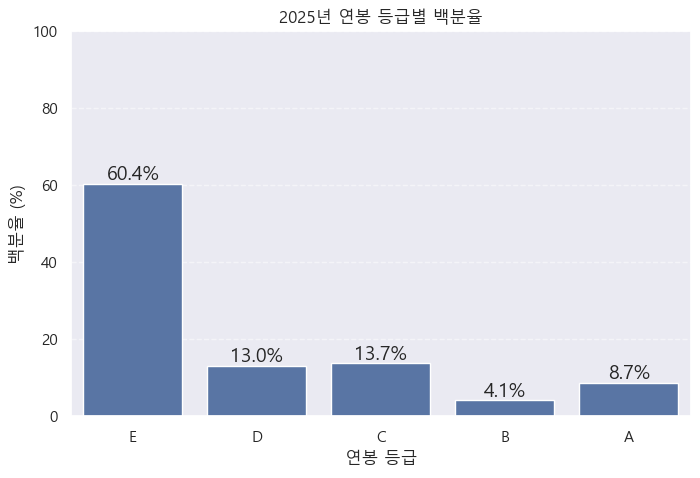

In [20]:
# 등급별 백분율 계산
grade_pct = sal_25['연봉등급'].value_counts(normalize=True).sort_index() * 100

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=grade_pct.index, y=grade_pct.values)
plt.ylabel('백분율 (%)')
plt.xlabel('연봉 등급')
plt.title('2025년 연봉 등급별 백분율')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시
for i, v in enumerate(grade_pct.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

In [33]:
bins = [0, 5000, 10000, 30000, float('inf')]
labels = ['D', 'C', 'B', 'A']

# 3. 연봉등급 컬럼 생성
sal_24['연봉등급'] = pd.cut(sal_24['연봉(만원)'], bins=bins, labels=labels, right=False)
sal_25_copy1['연봉등급'] = pd.cut(sal_25_copy1['연봉(만원)'], bins=bins, labels=labels, right=False)

In [35]:
display(sal_24.head())
display(sal_25_copy1.head())

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도,연봉등급
0,류현진,250000.0,4.56,54775,한화 이글스,10590,2024,A
1,채은성,100000.0,1.40,71340,한화 이글스,11215,2024,A
2,페냐,65000.0,0.35,187034,한화 이글스,15146,2024,A
3,페라자,104000.0,2.90,20686,한화 이글스,16121,2024,A
4,최재훈,60000.0,1.68,35760,한화 이글스,10170,2024,A


,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도,연봉등급
0,류현진,200000.0,2.77,72322,한화 이글스,10590,2025,A
1,폰세,130000.0,5.86,19116,한화 이글스,16313,2025,A
2,플로리얼,97500.0,1.96,50070,한화 이글스,16312,2025,A
3,엄상백,90000.0,-0.11,-783140,한화 이글스,11318,2025,A
4,와이스,84000.0,3.42,24584,한화 이글스,16153,2025,A


In [37]:
# 저장 
sal_24.to_csv('24년도_선수연봉_4레벨.csv', index=False, encoding='utf-8-sig')
sal_25_copy1.to_csv('25년도_선수연봉_4레벨.csv', index=False, encoding='utf-8-sig')

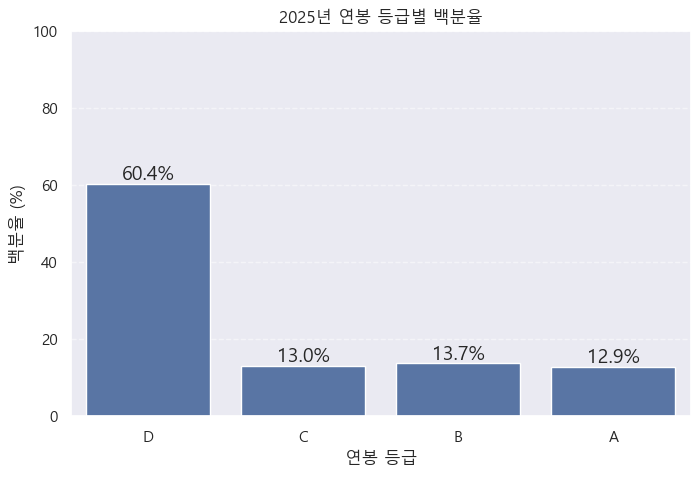

In [22]:
# 등급별 백분율 계산
grade_pct = sal_25_copy1['연봉등급'].value_counts(normalize=True).sort_index() * 100

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=grade_pct.index, y=grade_pct.values)
plt.ylabel('백분율 (%)')
plt.xlabel('연봉 등급')
plt.title('2025년 연봉 등급별 백분율')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시
for i, v in enumerate(grade_pct.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

In [30]:
# 등급 리스트 정의 (A~E)
grade_order = ['A', 'B', 'C', 'D']

# 결과 저장 리스트
samples = []

# 각 등급별 5명씩 샘플링
for grade in grade_order:
    sample = sal_25_copy1[sal_25_copy1['연봉등급'] == grade].head(5)
    samples.append(sample)

# 하나로 합치기
sample_df = pd.concat(samples)

# 보기 좋게 정렬
sample_df = sample_df[['연봉등급', '팀', '선수', '연봉(만원)', 'WAR']].sort_values(by='연봉등급', ascending=False)

# 결과 출력
disp.display(sample_df)

,연봉등급,팀,선수,연봉(만원),WAR
0,A,한화 이글스,류현진,200000.0,2.77
2,A,한화 이글스,플로리얼,97500.0,1.96
3,A,한화 이글스,엄상백,90000.0,-0.11
4,A,한화 이글스,와이스,84000.0,3.42
1,A,한화 이글스,폰세,130000.0,5.86
10,B,한화 이글스,리베라토,28700.0,1.18
11,B,한화 이글스,이태양,27000.0,0.05
12,B,한화 이글스,주현상,25000.0,-0.07
13,B,한화 이글스,박상원,22000.0,1.16
14,B,한화 이글스,장시환,15000.0,-


In [34]:
# 팀 이름 목록 (자동 추출)
team_list = sal_25_copy1['팀'].unique()
grade_list = ['A', 'B', 'C', 'D', 'E']

# 결과 저장
samples = []

# 이중 루프: 팀 × 등급
for team in team_list:
    for grade in grade_list:
        subset = sal_25_copy1[(sal_25_copy1['팀'] == team) & (sal_25_copy1['연봉등급'] == grade)]
        sample = subset.head(5)  # 최대 5명
        samples.append(sample)

# 합치기
sample_df = pd.concat(samples)

# 보기 좋게 정리
sample_df = sample_df[['팀', '연봉등급', '선수', '연봉(만원)', 'WAR']].sort_values(by=['팀', '연봉등급'], ascending=[True, False])

sample_df[sample_df['팀'] == '키움 히어로즈'].sort_values(by='연봉등급', ascending=False)

,팀,연봉등급,선수,연봉(만원),WAR
767,키움 히어로즈,A,푸이그,130000.0,-0.05
769,키움 히어로즈,A,카디네스,58500.0,-0.26
770,키움 히어로즈,A,이형종,60000.0,0.19
771,키움 히어로즈,A,원종현,50000.0,-0.61
768,키움 히어로즈,A,로젠버그,91000.0,2.40
777,키움 히어로즈,B,이용규,20000.0,-0.16
778,키움 히어로즈,B,하영민,16500.0,1.97
779,키움 히어로즈,B,김성민,11000.0,-0.19
780,키움 히어로즈,B,이주형,11000.0,3.62
781,키움 히어로즈,B,김재현,10000.0,-0.11


In [24]:
bins = [0, 3500, 5000, 10000, 30000, float('inf')]
labels = ['E', 'D', 'C', 'B', 'A']

# 3. 연봉등급 컬럼 생성
sal_24['연봉등급'] = pd.cut(sal_24['연봉(만원)'], bins=bins, labels=labels, right=False)
sal_25_copy2['연봉등급'] = pd.cut(sal_25_copy2['연봉(만원)'], bins=bins, labels=labels, right=False)

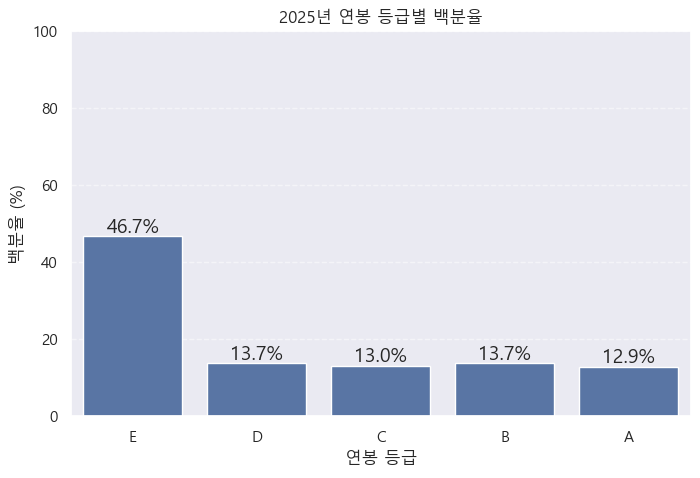

In [25]:
# 등급별 백분율 계산
grade_pct = sal_25_copy2['연봉등급'].value_counts(normalize=True).sort_index() * 100

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=grade_pct.index, y=grade_pct.values)
plt.ylabel('백분율 (%)')
plt.xlabel('연봉 등급')
plt.title('2025년 연봉 등급별 백분율')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시
for i, v in enumerate(grade_pct.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

In [26]:
# 등급 리스트 정의 (A~E)
grade_order = ['A', 'B', 'C', 'D', 'E']

# 결과 저장 리스트
samples = []

# 각 등급별 5명씩 샘플링
for grade in grade_order:
    sample = sal_25_copy2[sal_25_copy2['연봉등급'] == grade].head(5)
    samples.append(sample)

# 하나로 합치기
sample_df = pd.concat(samples)

# 보기 좋게 정렬
sample_df = sample_df[['연봉등급', '팀', '선수', '연봉(만원)', 'WAR']].sort_values(by='연봉등급', ascending=False)

# 결과 출력
import IPython.display as disp
disp.display(sample_df)

,연봉등급,팀,선수,연봉(만원),WAR
0,A,한화 이글스,류현진,200000.0,2.77
1,A,한화 이글스,폰세,130000.0,5.86
2,A,한화 이글스,플로리얼,97500.0,1.96
3,A,한화 이글스,엄상백,90000.0,-0.11
4,A,한화 이글스,와이스,84000.0,3.42
10,B,한화 이글스,리베라토,28700.0,1.18
11,B,한화 이글스,이태양,27000.0,0.05
12,B,한화 이글스,주현상,25000.0,-0.07
13,B,한화 이글스,박상원,22000.0,1.16
14,B,한화 이글스,장시환,15000.0,-


In [32]:
# 팀 이름 목록 (자동 추출)
team_list = sal_25_copy2['팀'].unique()
grade_list = ['A', 'B', 'C', 'D', 'E']

# 결과 저장
samples = []

# 이중 루프: 팀 × 등급
for team in team_list:
    for grade in grade_list:
        subset = sal_25_copy2[(sal_25_copy2['팀'] == team) & (sal_25_copy2['연봉등급'] == grade)]
        sample = subset.head(5)  # 최대 5명
        samples.append(sample)

# 합치기
sample_df = pd.concat(samples)

# 보기 좋게 정리
sample_df = sample_df[['팀', '연봉등급', '선수', '연봉(만원)', 'WAR']].sort_values(by=['팀', '연봉등급'], ascending=[True, False])

sample_df[sample_df['팀'] == '키움 히어로즈'].sort_values(by='연봉등급', ascending=False)

,팀,연봉등급,선수,연봉(만원),WAR
767,키움 히어로즈,A,푸이그,130000.0,-0.05
768,키움 히어로즈,A,로젠버그,91000.0,2.40
769,키움 히어로즈,A,카디네스,58500.0,-0.26
770,키움 히어로즈,A,이형종,60000.0,0.19
771,키움 히어로즈,A,원종현,50000.0,-0.61
777,키움 히어로즈,B,이용규,20000.0,-0.16
778,키움 히어로즈,B,하영민,16500.0,1.97
779,키움 히어로즈,B,김성민,11000.0,-0.19
780,키움 히어로즈,B,이주형,11000.0,3.62
781,키움 히어로즈,B,김재현,10000.0,-0.11


,팀,연봉등급,선수,연봉(만원),WAR
767,키움 히어로즈,A,푸이그,130000.0,-0.05
768,키움 히어로즈,A,로젠버그,91000.0,2.40
769,키움 히어로즈,A,카디네스,58500.0,-0.26
770,키움 히어로즈,A,이형종,60000.0,0.19
771,키움 히어로즈,A,원종현,50000.0,-0.61
777,키움 히어로즈,B,이용규,20000.0,-0.16
778,키움 히어로즈,B,하영민,16500.0,1.97
779,키움 히어로즈,B,김성민,11000.0,-0.19
780,키움 히어로즈,B,이주형,11000.0,3.62
781,키움 히어로즈,B,김재현,10000.0,-0.11


In [29]:
# 저장 
player_sal_all.to_csv('선수 연봉 데이터(등급).csv', index=False, encoding='utf-8-sig')

NameError: name 'player_sal_all' is not defined